# **Activity:** Assignment 10.2 - ARIMA Model

# **Name:** Raven Charles Roy P. Jacinto

# **Course and Section:** CPE019 - CPE32S3

# **Date of Submission:** May 4, 2024

# **Instructor:** Engr. Roman Richard


## **Instructions:**

#### **For this assignment, do the following:**

- Load time series data: data.csvDownload data.csv
- Visualize the time series
- Fit an ARIMA Model (baseline model order = (1,1,1))
- Improve the ARIMA Model
- Print the model summary
- Make a forecast (steps=10)
- Plot the forecast
- Perform a grid search
- Supplementary Activity:  do the same for this dataset - dataset_temperature.csv

### **Load time series data: data.csvDownload data.csv**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/data.csv')

In [ ]:
data.head()

,Month,CO2 (ppm)
0,1965-01,319.32
1,1965-02,320.36
2,1965-03,320.82
3,1965-04,322.06
4,1965-05,322.17


In [ ]:
data.shape

(192, 2)

In [ ]:
data.dtypes

Month         object
CO2 (ppm)    float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      192 non-null    object 
 1   CO2 (ppm)  192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [ ]:
data.isnull().sum()

Month        0
CO2 (ppm)    0
dtype: int64

### **Visualize the time series**

<ipython-input-77-19345f1b830b>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('/content/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


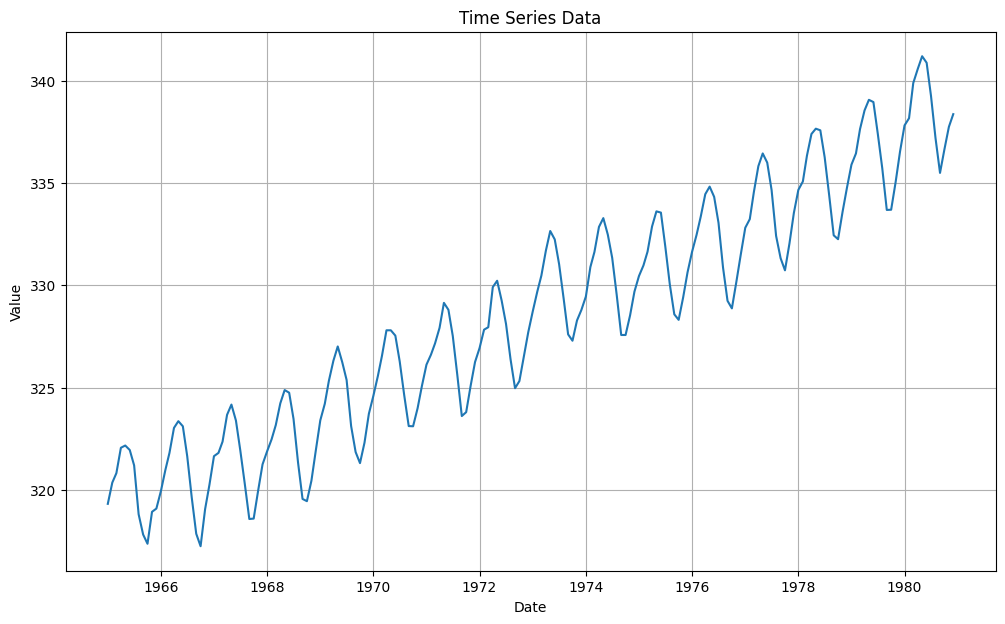

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Define a parser function to parse dates, if needed
def parser(x):
    return datetime.strptime(x, '%Y-%m')  # Assuming the date format in your CSV file is YYYY-MM-DD

df = pd.read_csv('/content/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
data = df.squeeze()

# Plot the time series data
plt.figure(figsize=(12, 7))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


## **Evaluation:** This graph suggests that this time series result is non-stationary and likely requires differencing to achieve stationarity. Therefore, it needs differencing in the dataset before applying a model techniques to capture and analyze its underlying patterns effectively.

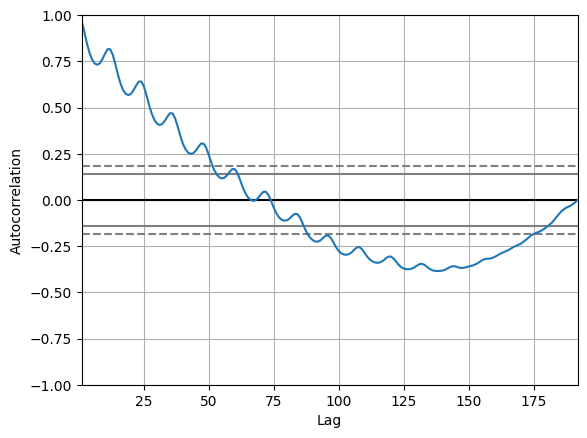

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data)
pyplot.show()

## **Evaluation:** We can conclude that the autocorrelation is positive for small lags 0-74, then it  oscillates around -0.375 to 0 for the rest of the lags. This suggests that the time series is somewhat similar to itself at small time lags, but there is no significant linear relationship between the time series and its lagged version for larger lags.

### **Fit an ARIMA Model (baseline model order = (1,1,1))**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1, 1, 1))
fit_model = model.fit()
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Mon, 29 Apr 2024   AIC                            457.638
Time:                        13:42:26   BIC                            467.395
Sample:                    01-01-1965   HQIC                           461.590
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


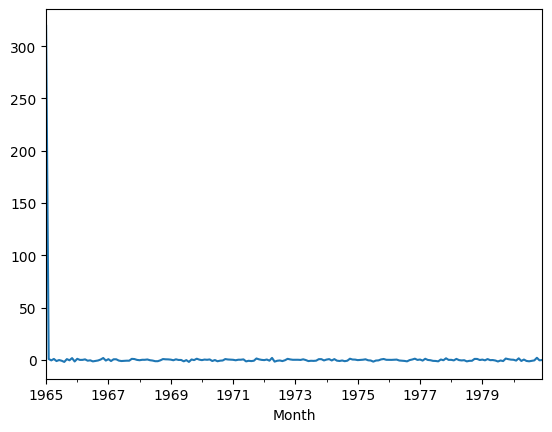

In [ ]:
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# line plot of residuals
residuals = fit_model.resid
residuals.plot()
pyplot.show()

## **Evaluation:** This suggests that the ARIMA model is adequately captures the variability in the dataset since the basis is if the residuals appear to be randomly scattered around zero, it suggests that the model is good or adequate in determining the variability of the data.



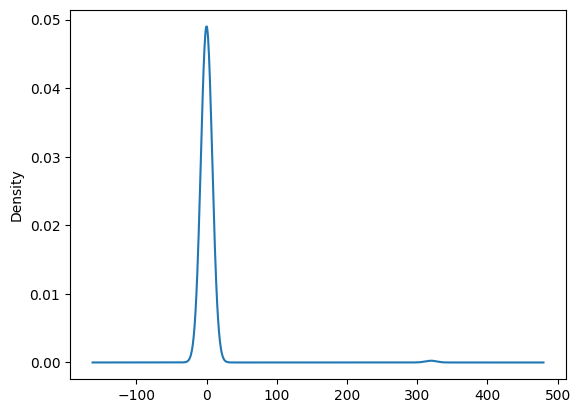

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()


## **Evaluation:** It indicates that the model is performing well but it could be improved since there is a slight skew in the distribution of residuals.

In [ ]:
print(residuals.describe())

count    192.000000
mean       1.698162
std       23.055889
min       -1.760398
25%       -0.571139
50%        0.034938
75%        0.566208
max      319.320000
dtype: float64


### **Improve the ARIMA Model and Print the summary of the fitted model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#From 1,1,1 to 9,1,0
model = ARIMA(data, order=(9, 1, 0))
fit_model = model.fit()

print(fit_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(9, 1, 0)   Log Likelihood                -140.466
Date:                Mon, 29 Apr 2024   AIC                            300.932
Time:                        14:17:29   BIC                            333.455
Sample:                    01-01-1965   HQIC                           314.106
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3686      0.089      4.132      0.000       0.194       0.543
ar.L2         -0.0844      0.077     -1.095      0.274      -0.236       0.067
ar.L3         -0.3772      0.070     -5.412      0.0

**Baseline model prediction and RMSE (1,1,1)**

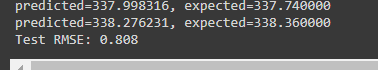

**Improved model prediction and RMSE (9,1,0)**

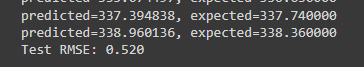

### **Evaluation:** I changed the autoregressive order from 1 to 9 to make the model a little bit complex enough for the dataset, since the baseline is too simple and did not do very well in predicting data, also baseline model has higher AIC and BIC. I changed moving average order from 1 to 0 to improve its interpretability and to align well with the data characteristics.

### The results indicates that there are notable improvements in the improved ARMA model compared to the baseline model. Since the lower values obtained for the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) signify a better fit of the model. A lower AIC and BIC suggest that the model is more close and better in capturing the underlying patterns in the data and a model with lower AIC and BIC values made more accurate predictions.Therefore, the observed decreases in AIC and BIC values in our model indicate enhanced predictive performance and a better representation of the data's characteristics.

### **Make a forecast (steps=10)**

In [ ]:
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m')

improved_data = read_csv('/content/data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
improved_data = pd.Series(improved_data.squeeze(), index=improved_data.index)  # Convert DataFrame to Series
improved_data.index = improved_data.index.to_period('M')

# split into train and test sets
X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(9,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Forecast for the next 10 steps
future_steps = 10
forecast = model_fit.forecast(steps=future_steps)[0]
print("\nForecast for the next", future_steps, "steps:", forecast)

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


<ipython-input-101-9db5360b7dba>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  improved_data = read_csv('/content/data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)


predicted=332.103475, expected=331.900000
predicted=329.879157, expected=330.050000
predicted=328.646069, expected=328.580000
predicted=328.256799, expected=328.310000
predicted=328.872319, expected=329.410000
predicted=330.302337, expected=330.630000
predicted=331.397000, expected=331.630000
predicted=332.123443, expected=332.460000
predicted=333.113073, expected=333.360000
predicted=334.001697, expected=334.450000
predicted=334.844237, expected=334.820000
predicted=334.145510, expected=334.320000
predicted=332.596087, expected=333.050000
predicted=331.240445, expected=330.870000
predicted=329.435156, expected=329.240000
predicted=328.715304, expected=328.870000
predicted=329.348084, expected=330.180000
predicted=331.451627, expected=331.500000
predicted=332.682529, expected=332.810000
predicted=333.534491, expected=333.230000
predicted=333.526337, expected=334.550000
predicted=335.367652, expected=335.820000
predicted=336.404763, expected=336.440000
predicted=335.799989, expected=335

### **Plot the forecast**

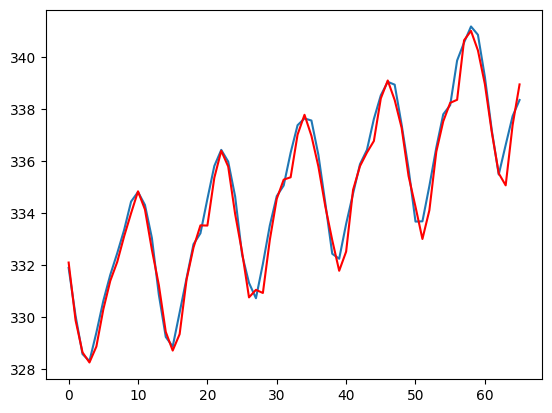

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## **Evaluation:** The graph shows that test data is fitting to the train data closely, which suggest that the model learn well during training.

### **Perform a grid search**

In [ ]:
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m')
improved_data = pd.read_csv('/content/data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
improved_data = pd.Series(improved_data.squeeze(), index=improved_data.index)
improved_data.index = improved_data.index.to_period('M')

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(improved_data.values, p_values, d_values, q_values)

<ipython-input-104-f2e9349fe8bf>:46: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  improved_data = pd.read_csv('/content/data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)


ARIMA(0, 0, 0) RMSE=8.375
ARIMA(0, 0, 1) RMSE=4.310
ARIMA(0, 0, 2) RMSE=2.611
ARIMA(0, 1, 0) RMSE=1.220
ARIMA(0, 1, 1) RMSE=0.901
ARIMA(0, 1, 2) RMSE=0.757
ARIMA(0, 2, 0) RMSE=0.935
ARIMA(0, 2, 1) RMSE=0.901
ARIMA(0, 2, 2) RMSE=0.878
ARIMA(1, 0, 0) RMSE=1.236
ARIMA(1, 0, 1) RMSE=0.913
ARIMA(1, 0, 2) RMSE=0.771
ARIMA(1, 1, 0) RMSE=0.867
ARIMA(1, 1, 1) RMSE=0.808
ARIMA(1, 1, 2) RMSE=0.742
ARIMA(1, 2, 0) RMSE=0.898
ARIMA(1, 2, 1) RMSE=0.898
ARIMA(1, 2, 2) RMSE=0.810
ARIMA(2, 0, 0) RMSE=0.891
ARIMA(2, 0, 1) RMSE=0.830
ARIMA(2, 0, 2) RMSE=0.765
ARIMA(2, 1, 0) RMSE=0.746
ARIMA(2, 1, 1) RMSE=0.662
ARIMA(2, 1, 2) RMSE=0.665
ARIMA(2, 2, 0) RMSE=0.897
ARIMA(2, 2, 1) RMSE=0.751
ARIMA(2, 2, 2) RMSE=0.746
ARIMA(4, 0, 0) RMSE=0.715
ARIMA(4, 0, 1) RMSE=0.670
ARIMA(4, 0, 2) RMSE=0.651
ARIMA(4, 1, 0) RMSE=0.707
ARIMA(4, 2, 0) RMSE=0.815
ARIMA(4, 2, 1) RMSE=0.790
ARIMA(4, 2, 2) RMSE=0.731
ARIMA(6, 0, 0) RMSE=0.709
ARIMA(6, 0, 1) RMSE=0.721
ARIMA(6, 1, 0) RMSE=0.610
ARIMA(6, 1, 1) RMSE=0.558
ARIMA(6, 1, 

### **Evaluation:** After performing the grid search technique, I found out that my improve model is not the best yet but setting the ARIMA paramenters to Autoregressive order 10, differencing order 2, and moving average to 2 got a RMSE result of 0.353, which is a lot better than RMSE of my improved model earlier, which has 0.520. After the Grid search, I knew and I learned that there is a better set of ARIMA parameters for the dataset that I am dealing with. This latest model and its new parameters must be utilized for this task to better achieve the goal of this time-series activity.

predicted=332.189779, expected=331.900000
predicted=329.759675, expected=330.050000
predicted=328.537606, expected=328.580000
predicted=328.383880, expected=328.310000
predicted=329.166202, expected=329.410000
predicted=330.428185, expected=330.630000
predicted=331.501434, expected=331.630000
predicted=332.016728, expected=332.460000
predicted=333.258929, expected=333.360000
predicted=334.202923, expected=334.450000
predicted=335.227444, expected=334.820000
predicted=334.534397, expected=334.320000
predicted=332.886338, expected=333.050000
predicted=331.297533, expected=330.870000
predicted=329.527974, expected=329.240000
predicted=329.110932, expected=328.870000
predicted=329.788940, expected=330.180000
predicted=331.474223, expected=331.500000
predicted=332.694050, expected=332.810000
predicted=333.569444, expected=333.230000
predicted=334.034719, expected=334.550000
predicted=335.471842, expected=335.820000
predicted=336.250585, expected=336.440000
predicted=336.010494, expected=335

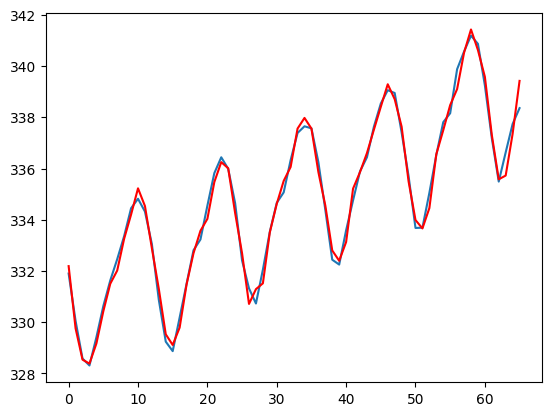

In [ ]:
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def parser(x):
    return datetime.strptime(x, '%Y-%m')

improved_data = read_csv('/content/data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
improved_data = pd.Series(improved_data.squeeze(), index=improved_data.index)  # Convert DataFrame to Series
improved_data.index = improved_data.index.to_period('M')

# Data split
X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(10,2,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Forecast for the next 10 steps
future_steps = 10
forecast = model_fit.forecast(steps=future_steps)[0]
print("\nForecast for the next", future_steps, "steps:", forecast)

# Evaluating Forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


## **Evaluation:** Upon testing the newly set ARIMA parameters, I tested its predicting capability and it gave a result of 0.349 RMSE which is a sign that my ARIMA model is predicting accurately and appropriately. In addition, the graph states that the training and testing is very close to each other, which suggests the model learned very well during training because it can project its accurate performance in testing.

# **Supplementary Activity:  do the same for this dataset - dataset_temperature.csv**

### **Loading dataset + checking data**

In [ ]:
import pandas as pd
t_data = pd.read_csv('/content/dataset_temperature.csv')

In [ ]:
t_data.shape

(794, 2)

In [ ]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Month                     793 non-null    object
 1   Mean monthly temperature  793 non-null    object
dtypes: object(2)
memory usage: 12.5+ KB


In [ ]:
t_data.head()

,Month,Mean monthly temperature
0,1907-01,33.3
1,1907-02,46
2,1907-03,43
3,1907-04,55
4,1907-05,51.8


In [ ]:
t_data.tail()

,Month,Mean monthly temperature
789,1972-10,51.7
790,1972-11,40.3
791,1972-12,30.3
792,NaN,NaN
793,Mean monthly temperature,1907 ? 1972


In [ ]:
t_data.isnull().sum()

Month                       1
Mean monthly temperature    1
dtype: int64

There is a missing value so we need to drop it.

In [ ]:
import pandas as pd

cleaned_data = t_data.dropna()
cleaned_data = t_data.iloc[:-2]


In [ ]:
# Checking for null values
cleaned_data.isnull().sum()

Month                       0
Mean monthly temperature    0
dtype: int64

In [ ]:
cleaned_data.tail()

,Month,Mean monthly temperature
787,1972-08,75.6
788,1972-09,64.1
789,1972-10,51.7
790,1972-11,40.3
791,1972-12,30.3


## **Evaluation:** Upon checking the data, I found out that there is one null value for columns "Month" and "Mean monthly temperature". I also noticed that Mean monthly temperature string is listed on "Month" column, which supposed to be a well-arranged data value only. Then the "Mean monthly temperature" column consist 1907 ? 1972, which is not a float value.

## What I did is I check the data, dropped the last 2 rows which are the null and the unwanted/wrong value for the temperature dataset to be able to visualize the plot of the data. Also, to be able to do ARIMA model for time series.

## **Visualization of time series**

<ipython-input-12-2b979792cabc>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  cleaned_data = pd.read_csv('/content/dataset_temperature.csv', header=None, parse_dates=[0], index_col=0, date_parser=parser)


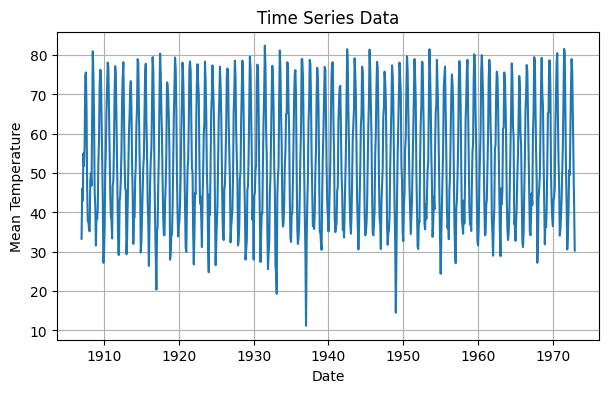

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

def parser(x):
    try:
        return datetime.strptime(x, '%Y-%m')
    except:
        return pd.NaT  # Return NaT for missing values

cleaned_data = pd.read_csv('/content/dataset_temperature.csv', header=None, parse_dates=[0], index_col=0, date_parser=parser)
cleaned_data = cleaned_data.squeeze()

# Convert the values in the Series to numeric type
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce')

# Plot the time series data
plt.figure(figsize=(7, 4))
plt.plot(cleaned_data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.grid(True)
plt.show()

### **Evaluation:** The average temperature has been increasing as the time progress. Also, the rate of increase appears to be accelerating.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

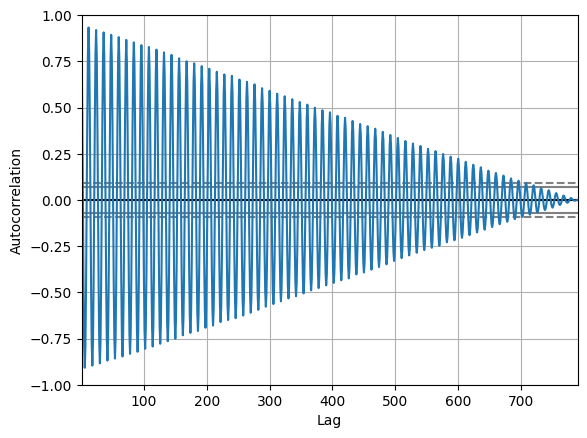

In [ ]:
from pandas.plotting import autocorrelation_plot

# Visualizing its correlations
autocorrelation_plot(cleaned_data)

### **Evaluation:** The correlation is decreasing over Lag. Meaning, as the lag goes up, the correlation is getting bad or worse until it gets 0, which means no correlation at all.

## **Fit an ARIMA Model (baseline model order = (1,1,1))**

In [ ]:
# Baseline model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(cleaned_data, order=(1, 1, 1))
fit_model = model.fit()
print(fit_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                  795
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2781.423
Date:                Wed, 01 May 2024   AIC                           5568.847
Time:                        08:48:41   BIC                           5582.878
Sample:                             0   HQIC                          5574.239
                                - 795                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigma2        65.0156      3.525     18.445      0.0

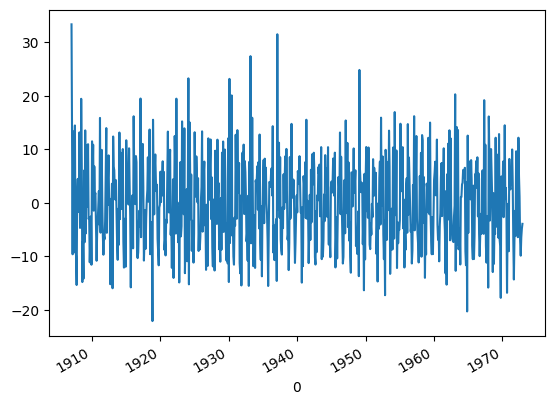

In [ ]:
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# line plot of residuals
residuals = fit_model.resid
residuals.plot()
pyplot.show()

### **Evaluation:** Since the pattern is fluctuating far from 0, it suggest inadequacy in data and it needs further refinement or a different modeling approach. Therefore, the baseline model is not good enough to predict and needs adjustments in paramaters p,d, and q.

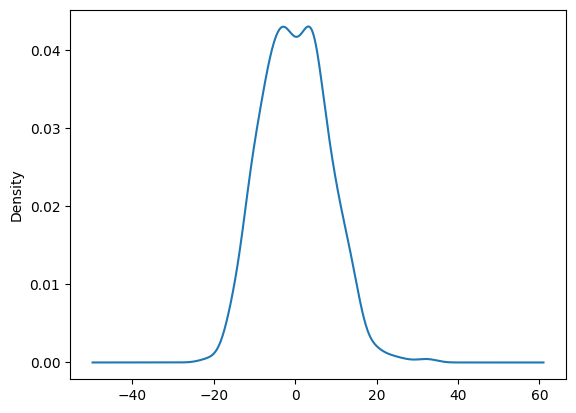

count    792.000000
mean       0.033156
std        8.152944
min      -22.090283
25%       -5.966690
50%       -0.197060
75%        5.394914
max       33.300000
dtype: float64


In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())

### **Evaluation:**

## **Perform a grid search**

In [ ]:
# Performing grid search to identify which parameter works good for the model

import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


# Load the preprocessed data
def parser(x):
    try:
        return datetime.strptime(x, '%Y-%m')
    except:
        return pd.NaT  # Return NaT for missing values

edited_data = pd.read_csv('/content/dataset_temperature.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)

edited_data = edited_data.dropna()
edited_data = edited_data.iloc[:-2]

edited_data = pd.Series(edited_data.squeeze(), index=edited_data.index)
edited_data.index = edited_data.index.to_period('M')


# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(edited_data.values, p_values, d_values, q_values)


<ipython-input-9-d387f7d6031f>:52: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  edited_data = pd.read_csv('/content/dataset_temperature.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)


ARIMA(0, 0, 0) RMSE=15.587
ARIMA(0, 0, 1) RMSE=10.202
ARIMA(0, 0, 2) RMSE=8.311
ARIMA(0, 1, 0) RMSE=9.282
ARIMA(0, 1, 1) RMSE=8.280
ARIMA(0, 1, 2) RMSE=7.866
ARIMA(0, 2, 0) RMSE=9.011
ARIMA(0, 2, 1) RMSE=8.743
ARIMA(0, 2, 2) RMSE=8.649
ARIMA(1, 0, 0) RMSE=8.867
ARIMA(1, 0, 1) RMSE=7.735
ARIMA(1, 0, 2) RMSE=7.241
ARIMA(1, 1, 0) RMSE=7.882
ARIMA(1, 1, 1) RMSE=7.882
ARIMA(1, 1, 2) RMSE=7.736
ARIMA(1, 2, 0) RMSE=8.694
ARIMA(1, 2, 1) RMSE=8.688
ARIMA(1, 2, 2) RMSE=8.210
ARIMA(2, 0, 0) RMSE=6.520
ARIMA(2, 0, 1) RMSE=4.906
ARIMA(2, 1, 0) RMSE=7.883
ARIMA(2, 1, 1) RMSE=7.849
ARIMA(2, 1, 2) RMSE=4.939
ARIMA(2, 2, 0) RMSE=8.684
ARIMA(2, 2, 1) RMSE=7.999
ARIMA(2, 2, 2) RMSE=8.595
ARIMA(4, 0, 0) RMSE=5.106
ARIMA(4, 0, 1) RMSE=4.614
ARIMA(4, 0, 2) RMSE=6.415
ARIMA(4, 1, 0) RMSE=6.871
ARIMA(4, 1, 1) RMSE=5.106
ARIMA(4, 1, 2) RMSE=4.584
ARIMA(4, 2, 0) RMSE=8.601
ARIMA(4, 2, 1) RMSE=6.877
ARIMA(6, 0, 0) RMSE=4.751
ARIMA(6, 0, 1) RMSE=4.502
ARIMA(6, 0, 2) RMSE=3.814
ARIMA(6, 1, 0) RMSE=6.272
ARIMA(6, 1

### **Evaluation:** Upon doing a grid search, I am able to find the best parameter setup for my improved ARIMA model, that is autoregressive order= 10, differencing order= 0, and moving average order = 1. It gave me a result of 3.722 RMSE which is the lowest of them all. I will use that combination for my improved model below. I used grid search first for me to save time trying different combinations of parameters to get the lowest RMSE.

## **Improve the ARIMA Model and Print the model summary**

In [ ]:
# For the improved ARIMA model I will use the best parameters I got from utilizing grid search

from statsmodels.tsa.arima.model import ARIMA
import numpy as np

edited_data_array = np.asarray(edited_data, dtype=np.float64)

model = ARIMA(edited_data_array, order=(10, 0, 2))
fit_model = model.fit()

print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  791
Model:                ARIMA(10, 0, 2)   Log Likelihood               -2236.878
Date:                Tue, 30 Apr 2024   AIC                           4501.755
Time:                        09:04:27   BIC                           4567.182
Sample:                             0   HQIC                          4526.903
                                - 791                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5700      0.209    255.913      0.000      53.160      53.980
ar.L1          1.4994      0.070     21.337      0.000       1.362       1.637
ar.L2         -1.0121      0.101    -10.067      0.0

### **Evaluation:** Upon using the improved model, I am able to lower the value of BIC and AIC, coming from 5568.847 AIC to 4501.755 AIC and  5582.878 BIC to 4567.182 BIC. Since the lower the value of AIC and BIC can be an indication that the model is performing well, I assumed that using the 10,0,2 parameter for my ARIMA model is just appropriate and indeed made my model perform better.

### Also I encountered error saying "pandas data cast to numpy dtype of object. Check input data with np.asarray(data)." so I converted data into float so that it can be fitted.

## **Make a forecast (steps=10) and Plot the forecast**

In [ ]:
from pandas import read_csv
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
    try:
        return datetime.strptime(x, '%Y-%m')
    except:
        return pd.NaT  # Return NaT for missing values

edited_data = read_csv('/content/dataset_temperature.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
edited_data.dropna(inplace=True)  # Drop rows with NaN values
edited_data = edited_data.iloc[:-2]

edited_data = pd.Series(edited_data.squeeze(), index=edited_data.index)
edited_data.index = edited_data.index.to_period('M')

# Convert edited_data to a numpy array of floats
edited_data = np.array(edited_data, dtype=float)

# Remove any NaN or non-numeric values
edited_data = edited_data[~np.isnan(edited_data)]
edited_data = edited_data[np.isfinite(edited_data)]

# split into train and test sets
size = int(len(edited_data) * 0.66)
train, test = edited_data[:size], edited_data[size:]

history = list(train)
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(10, 0, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Forecast for the next 10 steps
future_steps = 10
forecast = model_fit.forecast(steps=future_steps)[0]
print("\nForecast for the next", future_steps, "steps:", forecast)

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=74.470372, expected=79.700000
predicted=74.200882, expected=76.400000
predicted=65.845062, expected=66.200000
predicted=53.637620, expected=57.100000
predicted=43.148249, expected=46.300000
predicted=36.092342, expected=40.400000
predicted=34.908013, expected=34.500000
predicted=37.247094, expected=39.500000
predicted=43.740518, expected=43.200000
predicted=50.664011, expected=51.700000
predicted=60.748894, expected=60.700000
predicted=69.293347, expected=69.000000
predicted=73.281468, expected=79.000000
predicted=74.084846, expected=74.700000
predicted=65.787235, expected=68.600000
predicted=56.337257, expected=50.700000
predicted=43.210154, expected=41.300000
predicted=36.238124, expected=31.300000
predicted=32.755308, expected=30.700000
predicted=35.410817, expected=37.900000
predicted=43.182651, expected=37.500000
predicted=48.678256, expected=53.300000
predicted=62.179556, expected=62.700000
predicted=71.591779, expected=67.200000
predicted=74.944800, expected=78.300000


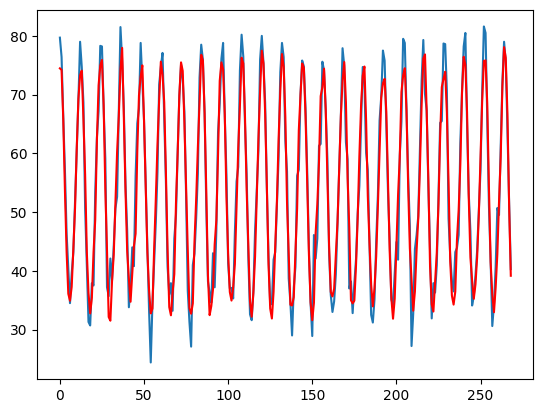

In [ ]:
from matplotlib import pyplot

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## **Evaluation:** Upon testing the best parameter I got from grid search, I tested its predicting capability and it gave a result of 3.728 suggests reasonable level of accuracy. Also, the forecast seems to capture the general trend of the data having fluctuations around 40. The Root Mean Squared Error (RMSE) of 3.728 suggests a reasonable accuracy. In addition, the graph states that the training and testing is very close to each other, which suggests the model learned during training.



## **Conclusion/Learnings**

### In conclusion, this activity is good enough for me to understand how ARIMA works if it is dealing with time series. The grid search technique is the only part of this activity that took so much time since when I deal with the supplementary activity data, which has approximately 790 entries and 2 columns, the processing consumed lots of time (5 hours and 40 minutes). Luckily, I managed to wait enough and I get the desired results after that which improved my ARIMA model. I learned so much from this activity, especially on how the ARIMA parameters affect the model, what needs to be done first before passing the data into the model, and also enchanced my debugging skills to achieve the desired results. I had fun doing this activity and I do think that I can use this in different time series dataset that I choose.
